In [1]:
import pickle
import os
import glob
import numpy as np
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from scipy.stats import kurtosis, skew
#from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
import os
import pickle
import numpy as np
import cv2
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
from skimage.segmentation import quickshift, mark_boundaries
from skimage.measure import regionprops
import copy
import random
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from skimage import filters
import pandas as pd
import warnings
import tensorflow as tf
import pickle
from scipy.stats import kendalltau
import sys
import scipy.stats as stats
from scipy.stats import wilcoxon
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from functools import partial
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from matplotlib import pyplot as plt
import time
from sklearn.utils import resample
from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity
import csv

import matplotlib.colors as mcolors
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer

from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
import shutil
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import sem
from sklearn.metrics import roc_auc_score
import gc
import matplotlib as mpl

In [ ]:
!pip install cliffs_delta

In [8]:
def calculate_med_mu(data, key):
  means_per_run = []
  for i in np.arange(0, len(data['entropy'][key]), step=1):
    means_per_run.append(np.mean(data['entropy'][key][i]))

  means_per_run = np.array(means_per_run)
  return np.round(np.median(means_per_run),3), np.round(np.mean(means_per_run),3)
  #return np.round(np.median(means_per_run),3) #change to mean and median as needed

In [ ]:
pkl_dir = '/content/drive/MyDrive/PhD/Results/bay_cofe/' # put the same path as the save_dir in ""RRPR_BayCoFE_stage1.ipynb

pkl_files = os.listdir(pkl_dir)
pkl_files = [file for file in os.listdir(pkl_dir) if file.endswith('.pkl')]

for pkl_file in pkl_files:
  with open(pkl_dir + pkl_file, 'rb') as f:
    data = pickle.load(f)

  print(pkl_file)
  for key in data['entropy'].keys():
    print(f"FE: {key} Sign Entropy: {calculate_med_mu(data, key)}")
    #print(f"FE: {key} lambda: {data['lambda']}")

In [ ]:
import pickle
import numpy as np
import os

# Directory containing your pickle files
pkl_dir = '/content/drive/MyDrive/PhD/Results/bay_cofe/' # put the same path as the save_dir in ""RRPR_BayCoFE_stage1.ipynb
pkl_files = [file for file in os.listdir(pkl_dir) if file.endswith('.pkl')]

# Initialize an empty dictionary to store min and max RMSE for each dataset
dataset_rmse_stats = {}

for pkl_file in pkl_files:
    with open(pkl_dir + pkl_file, 'rb') as f:
        data = pickle.load(f)

    # Extract the dataset name from the pkl file pattern (assuming it's dataset_*.pkl)
    dataset_name = pkl_file.split('_')[0]

    print(f"Processing dataset: {dataset_name} in file: {pkl_file}")

    # Get all RMSE values for this dataset
    all_rmse_values = []
    for key in data['rmse'].keys():
        all_rmse_values.extend(data['rmse'][key])  # Collect all RMSE values from each FE method

    # Find the min and max RMSE for this dataset
    rmse_min = np.min(all_rmse_values)
    rmse_max = np.max(all_rmse_values)

    # Save the min and max RMSE in the dataset_rmse_stats for reference
    dataset_rmse_stats[dataset_name] = (rmse_min, rmse_max)

    # Now normalize and print the normalized RMSE values for each FE method
    for key in data['rmse'].keys():
        rmse_values = data['rmse'][key]
        rmse_normalized = (rmse_values - rmse_min) / (rmse_max - rmse_min)  # Min-max normalization
        print(f"FE: {key} Mean Normalized RMSE: {np.round(np.mean(rmse_normalized),3)}")

In [ ]:
import pickle
import numpy as np
import os
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp


# Directory containing your pickle files
pkl_dir = '/content/drive/MyDrive/PhD/Results/bay_cofe/'  # Update this path to your directory
pkl_files = [file for file in os.listdir(pkl_dir) if file.endswith('.pkl')]

# Function to calculate mean per plit for CoSS as sign entropy
# of each feature is noted and we need to calculate the mean to get CoSS

def calculate_coss(data, key):
    means_per_run = []
    for i in np.arange(0, len(data['entropy'][key]), step=1):
        means_per_run.append(np.mean(data['entropy'][key][i]))
    return np.array(means_per_run)

# Loop through each pickle file and perform Mann-Whitney U test for CoFE and Bay-CoFE
for pkl_file in pkl_files:
    with open(pkl_dir + pkl_file, 'rb') as f:
        data = pickle.load(f)

    # Extract the dataset name from the pkl file pattern
    dataset_name = pkl_file.split('_')[0]
    print(f"\nProcessing dataset: {dataset_name} in file: {pkl_file}")

    # Calculate mean CoSS per run for all methods
    coss_data = {}
    for key in data['entropy'].keys():
        coss_data[key] = calculate_coss(data, key)

    # Perform Mann-Whitney U test for CoFE and Bay-CoFE against all other methods
    methods_to_test = ['cofe', 'baycofe']
    other_methods = [key for key in coss_data.keys() if key not in methods_to_test]

    for method in methods_to_test:
        print(f"\nMann-Whitney U test results for {method}:")
        for other_method in other_methods:
            # Mann-Whitney U test with the alternative hypothesis that method > other_method
            stat, p_value = mannwhitneyu(coss_data[method], coss_data[other_method], alternative='less')
            print(f"CoSS gain  {method} vs {other_method}: U-Statistic = {stat}, p-value = {p_value:.2e}")

In [ ]:
!pip install cliffs_delta
import pickle
import numpy as np
import os
from cliffs_delta import cliffs_delta  # Install cliffs-delta package


# Function to calculate Cliff's Delta
def calculate_cliffs_delta(group1, group2):
    delta, _ = cliffs_delta(group1, group2)  # Get Cliff's Delta value
    return delta

def get_rmse_dict(data):

    rmse_dict ={}
    all_rmse_values = []
    for key in data['rmse'].keys():
        all_rmse_values.extend(data['rmse'][key])  # Collect all RMSE values from each FE method

        # Find the min and max RMSE for this dataset
        rmse_min = np.min(all_rmse_values)
        rmse_max = np.max(all_rmse_values)

        for key in data['rmse'].keys():
            rmse_values = data['rmse'][key]
            rmse_normalized = (rmse_values - rmse_min) / (rmse_max - rmse_min)  # Min-max normalization
            rmse_dict[key] = rmse_normalized

    return rmse_dict


def get_coss_dict(data):
    coss_dict = {}
    for key in data['entropy'].keys():
      means_per_run = []
      for i in np.arange(0, len(data['entropy'][key]), step=1):
          means_per_run.append(np.mean(data['entropy'][key][i]))
      coss_dict[key] = np.array(means_per_run)
    return coss_dict


# Directory containing your pickle files
#pkl_dir = 'bay_cofe-20240930T005541Z-001/bay_cofe/'
pkl_dir = 'drive/MyDrive/PhD/Results/bay_cofe/'
pkl_files = [file for file in os.listdir(pkl_dir) if file.endswith('.pkl')]

#indices_to_remove = [3, 7, 11]

# Remove items from the list
#pkl_files = [file for i, file in enumerate(pkl_files) if i not in indices_to_remove]

#pkl_files = pkl_files[0:8]
coss_gains = []
rmse_losses = []

for pkl_file in pkl_files:
    with open(pkl_dir + pkl_file, 'rb') as f:
        data = pickle.load(f)

    dataset_name = pkl_file.split('_')[0]
    print(f"Processing dataset: {dataset_name} in file: {pkl_file}")

    coss_dict = get_coss_dict(data)
    rmse_dict = get_rmse_dict(data)

    methods_to_test = ['cofe', 'baycofe']
    other_methods = [key for key in coss_dict.keys() if key not in methods_to_test]

    # Calculate Cliff's Delta for CoSS
    for method in methods_to_test:
        print(f"\nCliff's Delta for {method} (CoSS):")
        for other_method in other_methods:
            delta_coss = calculate_cliffs_delta(coss_dict[other_method], coss_dict[method])
            if (method == 'cofe' and other_method != 'baycofe'):
                coss_gains.append(delta_coss)
            print(f"  {method} vs {other_method}: Cliff's Delta = {delta_coss}")

    # Calculate Cliff's Delta for RMSE
    for method in methods_to_test:
        print(f"\nCliff's Delta for {method} (RMSE):")
        for other_method in other_methods:
            delta_rmse = calculate_cliffs_delta(rmse_dict[method], rmse_dict[other_method])
            if (method == 'cofe' and other_method != 'baycofe'):
                rmse_losses.append(delta_rmse)
            print(f"  {method} vs {other_method}: Cliff's Delta = {delta_rmse}")

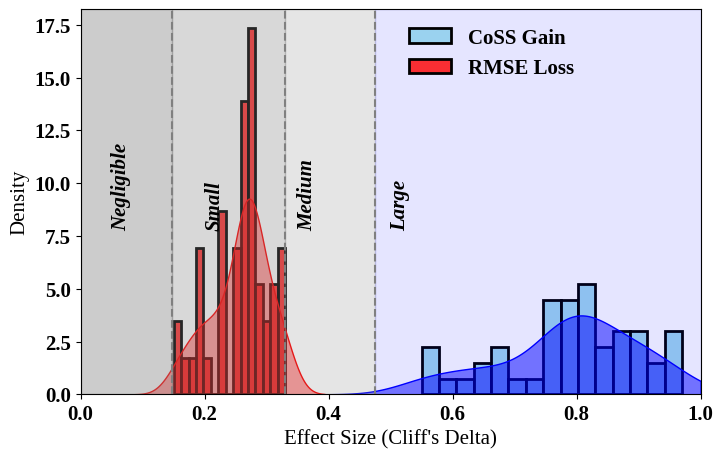

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'bold'

# Plotting the Histogram
plt.figure(figsize=(8, 5))

# Plot CoSS Gain (in blue)
sns.histplot(coss_gains, bins=15, color='skyblue', label='CoSS Gain', alpha=0.8, stat='density', edgecolor='black', linewidth=2)

# Plot RMSE Loss (in red)
sns.histplot(rmse_losses, bins=15, color='red', label='RMSE Loss', alpha=0.8, stat='density', edgecolor='black', linewidth=2)

# Add KDE curves with filled area
sns.kdeplot(coss_gains, color='blue', fill=True, alpha=0.5, clip=(0,1))
sns.kdeplot(rmse_losses, color='red', fill=True, alpha=0.4, clip=(0,1))

# Add vertical lines for effect size thresholds
plt.axvline(x=0.147, color='gray', linestyle='--')
plt.axvline(x=0.33, color='gray', linestyle='--')
plt.axvline(x=0.474, color='gray', linestyle='--')

# Shading background for effect size categories
plt.axvspan(0, 0.147, color='gray', alpha=0.4)
plt.axvspan(0.147, 0.33, color='gray', alpha=0.3)
plt.axvspan(0.33, 0.474, color='gray', alpha=0.2)
plt.axvspan(0.474, 1, color='blue', alpha=0.1)

# Add labels for the regions with rotation
plt.text(0.05, 8, 'Negligible', fontsize=15, style='italic', rotation=90)
plt.text(0.20, 8, 'Small', fontsize=15, style='italic', rotation=90)
plt.text(0.35, 8, 'Medium', fontsize=15, style='italic', rotation=90)
plt.text(0.50, 8, 'Large', fontsize=15, style='italic', rotation=90)

# Set plot labels and title
plt.xlabel("Effect Size (Cliff's Delta)")
plt.ylabel("Density")
#plt.title("Effect Size (Cliff's Delta) for CoSS Gain and RMSE Loss")
#plt.legend(loc='lower left')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1), frameon=False)

# Set x-axis limits to remove the extra white space
plt.xlim(0, 1)

#plt.savefig('cliff_delta_baycofe.pdf')
# Display the plot
plt.show()

In [ ]:
!pip install cliffs_delta
import pickle
import numpy as np
import os
from cliffs_delta import cliffs_delta  # Install cliffs-delta package


# Function to calculate Cliff's Delta
def calculate_cliffs_delta(group1, group2):
    delta, _ = cliffs_delta(group1, group2)  # Get Cliff's Delta value
    return delta

def get_rmse_dict(data):

    rmse_dict ={}
    all_rmse_values = []
    for key in data['rmse'].keys():
        all_rmse_values.extend(data['rmse'][key])  # Collect all RMSE values from each FE method

        # Find the min and max RMSE for this dataset
        rmse_min = np.min(all_rmse_values)
        rmse_max = np.max(all_rmse_values)

        for key in data['rmse'].keys():
            rmse_values = data['rmse'][key]
            rmse_normalized = (rmse_values - rmse_min) / (rmse_max - rmse_min)  # Min-max normalization
            rmse_dict[key] = rmse_normalized

    return rmse_dict


def get_coss_dict(data):
    coss_dict = {}
    for key in data['entropy'].keys():
      means_per_run = []
      for i in np.arange(0, len(data['entropy'][key]), step=1):
          means_per_run.append(np.mean(data['entropy'][key][i]))
      coss_dict[key] = np.array(means_per_run)
    return coss_dict


# Directory containing your pickle files
#pkl_dir = 'bay_cofe-20240930T005541Z-001/bay_cofe/'
pkl_dir = 'drive/MyDrive/PhD/Results/cofe/'
pkl_files = [file for file in os.listdir(pkl_dir) if file.endswith('.pkl')]

#indices_to_remove = [3, 7, 11]

# Remove items from the list
#pkl_files = [file for i, file in enumerate(pkl_files) if i not in indices_to_remove]

#pkl_files = pkl_files[0:8]
coss_gains = []
rmse_losses = []

for pkl_file in pkl_files:
    with open(pkl_dir + pkl_file, 'rb') as f:
        data = pickle.load(f)

    dataset_name = pkl_file.split('_')[0]
    print(f"Processing dataset: {dataset_name} in file: {pkl_file}")

    coss_dict = get_coss_dict(data)
    rmse_dict = get_rmse_dict(data)

    methods_to_test = ['sefe']
    other_methods = [key for key in coss_dict.keys() if key not in methods_to_test]

    # Calculate Cliff's Delta for CoSS
    for method in methods_to_test:
        print(f"\nCliff's Delta for {method} (CoSS):")
        for other_method in other_methods:
            delta_coss = calculate_cliffs_delta(coss_dict[other_method], coss_dict[method])
            coss_gains.append(delta_coss)
            print(f"  {method} vs {other_method}: Cliff's Delta = {delta_coss}")

    # Calculate Cliff's Delta for RMSE
    for method in methods_to_test:
        print(f"\nCliff's Delta for {method} (RMSE):")
        for other_method in other_methods:
            delta_rmse = calculate_cliffs_delta(rmse_dict[method], rmse_dict[other_method])
            rmse_losses.append(delta_rmse)
            print(f"  {method} vs {other_method}: Cliff's Delta = {delta_rmse}")

In [ ]:
### Compute MANN Whitney U test and Effect sizes
import pickle
import numpy as np
import os
from cliffs_delta import cliffs_delta
from scipy.stats import mannwhitneyu

def calculate_cliffs_delta(group1, group2):
    delta, _ = cliffs_delta(group1, group2)
    return delta

def mann_whitney_test(group1, group2):
    stat, p_value = mannwhitneyu(group1, group2, alternative='greater')
    return stat, p_value

def get_rmse_dict(data):
    rmse_dict = {}
    all_rmse_values = []
    for key in data['rmse'].keys():
        all_rmse_values.extend(data['rmse'][key])

    rmse_min = np.min(all_rmse_values)
    rmse_max = np.max(all_rmse_values)

    for key in data['rmse'].keys():
        rmse_values = data['rmse'][key]
        rmse_normalized = (rmse_values - rmse_min) / (rmse_max - rmse_min)
        rmse_dict[key] = rmse_normalized

    return rmse_dict

def get_coss_dict(data):
    coss_dict = {}
    for key in data['entropy'].keys():
        means_per_run = [np.mean(run) for run in data['entropy'][key]]
        coss_dict[key] = np.array(means_per_run)
    return coss_dict

pkl_dir = 'drive/MyDrive/PhD/Results/bay_cofe/'#'drive/MyDrive/PhD/Results/bay_cofe/'
pkl_files = [file for file in os.listdir(pkl_dir) if file.endswith('.pkl')]
#pkl_files = [file for file in pkl_files if '_R_50' in file]

for pkl_file in pkl_files:
    with open(pkl_dir + pkl_file, 'rb') as f:
        data = pickle.load(f)

    dataset_name = pkl_file.split('_')[0]
    print(f"\n\nProcessing dataset: {dataset_name} in file: {pkl_file}")

    coss_dict = get_coss_dict(data)
    rmse_dict = get_rmse_dict(data)

    ### FOR CoFE
    cofe_coss = coss_dict['cofe']
    cofe_rmse = rmse_dict['cofe']

    for method, coss_scores in coss_dict.items():
        #if method != 'baycofe' and method != 'cofe':
        if method == 'baycofe':
            delta_coss = calculate_cliffs_delta(coss_scores, cofe_coss)
            mw_stat_coss, mw_p_coss = mann_whitney_test(coss_scores, cofe_coss)
            print(f"CoSS - CoFE vs {method}: Cliff's Delta = {delta_coss}, MW U-statistic = {mw_stat_coss}, p-value = {mw_p_coss:.2e}")

    for method, rmse_scores in rmse_dict.items():
        #if method != 'baycofe' and method != 'cofe':
        if method == 'baycofe':
            delta_rmse = calculate_cliffs_delta(cofe_rmse, rmse_scores)
            mw_stat_rmse, mw_p_rmse = mann_whitney_test(cofe_rmse, rmse_scores)
            print(f"RMSE Loss- CoFE vs {method}: Cliff's Delta = {delta_rmse}, MW U-statistic = {mw_stat_rmse}, p-value = {mw_p_rmse:.2e}")

"""
    ### FOR Bay CoFE
    baycofe_coss = coss_dict['baycofe']
    baycofe_rmse = rmse_dict['baycofe']

    for method, coss_scores in coss_dict.items():
        if method != 'baycofe' and method != 'cofe':
            delta_coss = calculate_cliffs_delta(coss_scores, baycofe_coss)
            mw_stat_coss, mw_p_coss = mann_whitney_test(coss_scores, baycofe_coss)
            print(f"CoSS - BayCoFE vs {method}: Cliff's Delta = {delta_coss}, MW U-statistic = {mw_stat_coss}, p-value = {mw_p_coss:.2e}")

    for method, rmse_scores in rmse_dict.items():
        if method != 'baycofe' and method != 'cofe':
            delta_rmse = calculate_cliffs_delta(baycofe_rmse, rmse_scores)
            mw_stat_rmse, mw_p_rmse = mann_whitney_test(baycofe_rmse, rmse_scores)
            print(f"RMSE Loss- BayCoFE vs {method}: Cliff's Delta = {delta_rmse}, MW U-statistic = {mw_stat_rmse}, p-value = {mw_p_rmse:.2e}")

"""



Processing dataset: housing in file: housing_bayCoFE_R_0_numfolds_CVk_5.pkl
CoSS - CoFE vs baycofe: Cliff's Delta = -0.03, MW U-statistic = 194.0, p-value = 5.77e-01
RMSE Loss- CoFE vs baycofe: Cliff's Delta = -0.185, MW U-statistic = 163.0, p-value = 8.45e-01


Processing dataset: housing in file: housing_bayCoFE_R_1.0_numfolds_CVk_5.pkl
CoSS - CoFE vs baycofe: Cliff's Delta = -0.1, MW U-statistic = 180.0, p-value = 7.26e-01
RMSE Loss- CoFE vs baycofe: Cliff's Delta = -0.0725, MW U-statistic = 185.5, p-value = 6.58e-01


Processing dataset: housing in file: housing_bayCoFE_R_10_numfolds_CVk_5.pkl
CoSS - CoFE vs baycofe: Cliff's Delta = -0.0275, MW U-statistic = 194.5, p-value = 5.79e-01
RMSE Loss- CoFE vs baycofe: Cliff's Delta = -0.2525, MW U-statistic = 149.5, p-value = 9.16e-01


Processing dataset: housing in file: housing_bayCoFE_R_50_numfolds_CVk_5.pkl
CoSS - CoFE vs baycofe: Cliff's Delta = -0.1875, MW U-statistic = 162.5, p-value = 8.81e-01
RMSE Loss- CoFE vs baycofe: Cliff'

'\n    ### FOR Bay CoFE\n    baycofe_coss = coss_dict[\'baycofe\']\n    baycofe_rmse = rmse_dict[\'baycofe\']\n\n    for method, coss_scores in coss_dict.items():\n        if method != \'baycofe\' and method != \'cofe\':\n            delta_coss = calculate_cliffs_delta(coss_scores, baycofe_coss)\n            mw_stat_coss, mw_p_coss = mann_whitney_test(coss_scores, baycofe_coss)\n            print(f"CoSS - BayCoFE vs {method}: Cliff\'s Delta = {delta_coss}, MW U-statistic = {mw_stat_coss}, p-value = {mw_p_coss:.2e}")\n\n    for method, rmse_scores in rmse_dict.items():\n        if method != \'baycofe\' and method != \'cofe\':\n            delta_rmse = calculate_cliffs_delta(baycofe_rmse, rmse_scores)\n            mw_stat_rmse, mw_p_rmse = mann_whitney_test(baycofe_rmse, rmse_scores)\n            print(f"RMSE Loss- BayCoFE vs {method}: Cliff\'s Delta = {delta_rmse}, MW U-statistic = {mw_stat_rmse}, p-value = {mw_p_rmse:.2e}")\n\n'

[4]


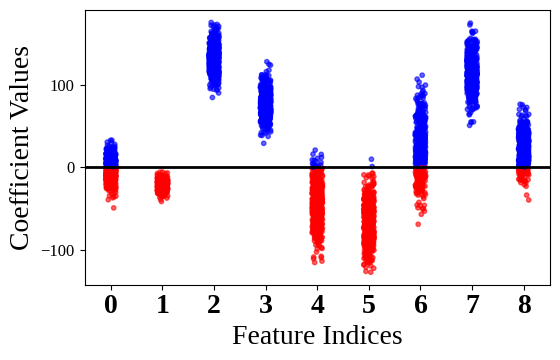

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 20
mpl.rcParams['font.weight'] = 'normal'


def remove_highly_correlated_features_pd(X, threshold):
    # Convert X to a pandas DataFrame
    df = pd.DataFrame(X)
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    # Create a mask to remove the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set the upper triangle values to NaN
    corr_matrix.mask(mask, inplace=True)

    # Find the highly correlated features
    cols_to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]

    # Drop the highly correlated features from the DataFrame
    reduced_df = df.drop(columns=cols_to_drop)

    # Convert the reduced DataFrame back to numpy array
    X_reduced = reduced_df.to_numpy()

    return X_reduced, cols_to_drop


# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Simulating the behavior of removing highly correlated features
threshold = 0.80

X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, threshold)
X = X_reduced
print(removed_feature_names)

# Scale features
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)
X = X_scaled

# Fit the Bayesian Ridge model
model = BayesianRidge(lambda_init=1e-10, fit_intercept=True, compute_score=True)
model.fit(X_scaled, y)

# Get coefficient means and the standard deviations using model.sigma_
coef_mean = model.coef_
beta_stds = np.sqrt(np.diag(model.sigma_))  # Correctly compute the standard deviations from the covariance matrix

# Prepare data for strip plot
plt.figure(figsize=(6, 4))

coeff_samples = []
feature_indices = []
colors = []

# Generate coefficient samples and color based on sign
for i in range(len(coef_mean)):
    samples = np.random.normal(coef_mean[i], beta_stds[i], 500)
    coeff_samples.extend(samples)
    feature_indices.extend([i] * 500)
    colors.extend(['blue' if sample > 0 else 'red' for sample in samples])

# Add jitter for better visibility in strip plot
jittered_indices = [i + np.random.uniform(-0.1, 0.1, 500) for i in range(len(coef_mean))]
flattened_jittered_indices = [item for sublist in jittered_indices for item in sublist]

# Create the strip plot with color-coded points
plt.scatter(flattened_jittered_indices, coeff_samples, c=colors, alpha=0.6, s=10)

# Add plot elements for a polished look
plt.xticks(np.arange(len(X_reduced[0])), np.arange(len(X_reduced[0])), fontsize=20, fontweight='bold')
plt.yticks(fontsize=12)
plt.axhline(0, color='black', linewidth=2)

# Set labels with professional formatting
plt.xlabel("Feature Indices", fontsize=20, fontweight='normal')
plt.ylabel("Coefficient Values", fontsize=20, fontweight='normal')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('h_diabetes_br1.png')

# Show the strip plot
plt.show()

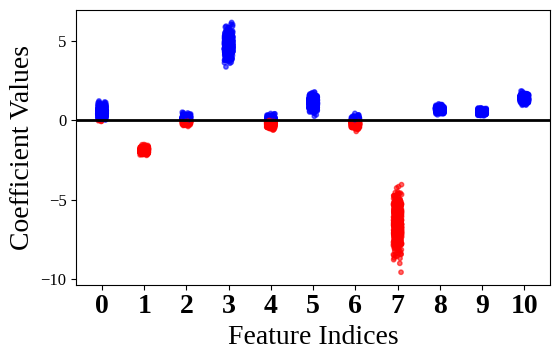

In [ ]:
# Load the Wine Quality dataset and prepare the data
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 20
mpl.rcParams['font.weight'] = 'normal'


# Load the wine quality dataset from OpenML
wine_data = fetch_openml(name='wine-quality-white', version=1)

# Prepare the features and target
X = wine_data.data
y = wine_data.target

# Scale features
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)
X = X_scaled

# Fit the Bayesian Ridge model
model = BayesianRidge(lambda_init=1e-10, fit_intercept=True, compute_score=True)
model.fit(X, y)

# Get coefficient means and the standard deviations using model.sigma_
coef_mean = model.coef_
beta_stds = np.sqrt(np.diag(model.sigma_))  # Correctly compute the standard deviations from the covariance matrix

# Prepare data for strip plot
plt.figure(figsize=(6, 4))

coeff_samples = []
feature_indices = []
colors = []

# Generate coefficient samples and color based on sign
for i in range(len(coef_mean)):
    samples = np.random.normal(coef_mean[i], beta_stds[i], 500)
    coeff_samples.extend(samples)
    feature_indices.extend([i] * 500)
    colors.extend(['blue' if sample > 0 else 'red' for sample in samples])

# Add jitter for better visibility in strip plot
jittered_indices = [i + np.random.uniform(-0.1, 0.1, 500) for i in range(len(coef_mean))]
flattened_jittered_indices = [item for sublist in jittered_indices for item in sublist]

# Create the strip plot with color-coded points
plt.scatter(flattened_jittered_indices, coeff_samples, c=colors, alpha=0.6, s=10)

# Add plot elements for a polished look
plt.xticks(np.arange(len(X.columns)), np.arange(0, len(X.columns),step=1), fontsize=20, fontweight='bold')
plt.yticks(fontsize=12)
plt.axhline(0, color='black', linewidth=2)

# Set labels with professional formatting
plt.xlabel("Feature Indices", fontsize=20, fontweight='normal')
plt.ylabel("Coefficient Values", fontsize=20, fontweight='normal')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('h_wine_br1.png')

# Show the strip plot
plt.show()